In [1]:
pip install ucimlrepo

In [27]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X = car_evaluation.data.features
y = car_evaluation.data.targets

# metadata
df = pd.concat([X, y], axis=1)
# print(car_evaluation.metadata)

# # variable information
# print(car_evaluation.variables)
print(df.head())


  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [28]:
import pandas as pd

In [23]:
# df=pd.DataFrame(car_evaluation.data.features)
# df

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [20]:
# df=pd.DataFrame(car_evaluation.data.targets)
# df

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


In [30]:
df.describe(include='all').T

,count,unique,top,freq
buying,1728,4,vhigh,432
maint,1728,4,vhigh,432
doors,1728,4,2,432
persons,1728,3,2,576
lug_boot,1728,3,small,576
safety,1728,3,low,576
class,1728,4,unacc,1210


In [31]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']
df.columns=col_names
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [32]:
for col in col_names:
  print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [33]:
df[df.duplicated()]

,buying,maint,doors,persons,lug_boot,safety,class


In [34]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['buying']=oe.fit_transform(df[['buying']])
df['maint']=oe.fit_transform(df[['maint']])
df['doors']=oe.fit_transform(df[['doors']])
df['persons']=oe.fit_transform(df[['persons']])
df['lug_boot']=oe.fit_transform(df[['lug_boot']])
df['safety']=oe.fit_transform(df[['safety']])
df['class']=oe.fit_transform(df[['class']])

In [35]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,1.0,2.0
1,3.0,3.0,0.0,0.0,2.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,1.0,2.0
4,3.0,3.0,0.0,0.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1724,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1725,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1726,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [36]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
# y_pred=rf.predict(X_test)

RandomForestClassifier()

In [39]:
pred1=rf.predict(X_test)
pred1

array([2., 2., 2., 0., 2., 0., 2., 2., 2., 2., 3., 1., 2., 2., 2., 2., 2.,
       2., 2., 0., 2., 0., 0., 2., 0., 2., 2., 2., 2., 2., 0., 2., 2., 2.,
       0., 0., 1., 2., 2., 2., 2., 2., 0., 0., 1., 0., 2., 2., 2., 2., 2.,
       2., 0., 2., 2., 2., 2., 2., 2., 1., 2., 0., 2., 2., 0., 3., 2., 0.,
       0., 2., 2., 2., 2., 2., 1., 3., 2., 2., 2., 2., 3., 2., 2., 0., 3.,
       0., 2., 0., 3., 0., 2., 1., 2., 2., 2., 1., 2., 2., 2., 0., 2., 2.,
       2., 2., 1., 1., 0., 2., 2., 0., 2., 2., 2., 2., 2., 0., 1., 2., 2.,
       2., 2., 3., 2., 0., 0., 2., 1., 2., 2., 2., 2., 2., 0., 2., 2., 0.,
       2., 3., 2., 2., 2., 0., 0., 0., 2., 0., 2., 2., 2., 2., 1., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 0., 2., 0., 3.,
       0., 2., 0., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2., 1., 0., 2.,
       2., 0., 2., 2., 2., 0., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 1., 2., 0., 2., 2., 0., 2., 2., 1., 2., 2., 2., 1., 3.,
       2., 2., 0., 2., 2.

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred1)

0.9682080924855492

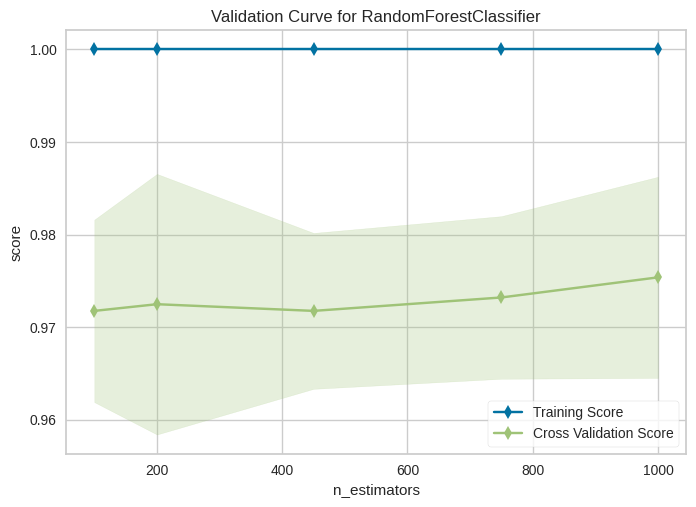

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                estimator=RandomForestClassifier(), param_name='n_estimators',
                param_range=array([ 100,  200,  450,  750, 1000]),
                scoring='accuracy')


In [42]:
  from yellowbrick.model_selection import validation_curve
  num_est=[100,200,450,750,1000]
  print(validation_curve(RandomForestClassifier(),X=X_train,y=y_train,param_name='n_estimators',param_range=num_est,scoring='accuracy'))

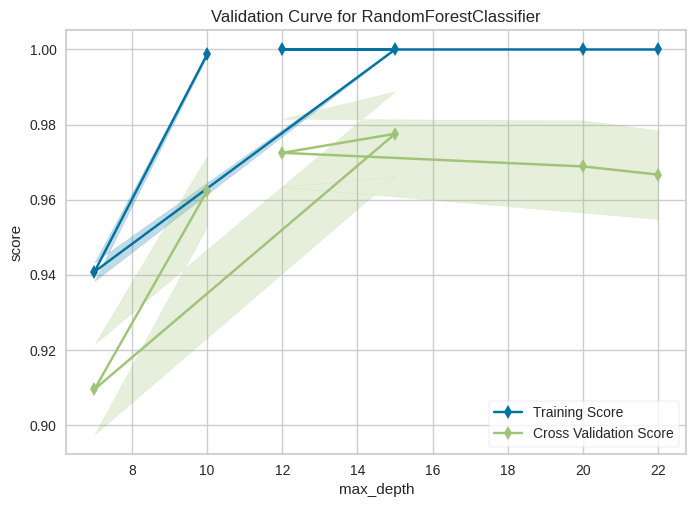

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                estimator=RandomForestClassifier(), param_name='max_depth',
                param_range=array([10,  7, 15, 12, 20, 22]),
                scoring='accuracy')


In [44]:
  from yellowbrick.model_selection import validation_curve
  depth_vals=[10,7,15,12,20,22]
  print(validation_curve(RandomForestClassifier(),X=X_train,y=y_train,param_name='max_depth',param_range=depth_vals,scoring='accuracy'))

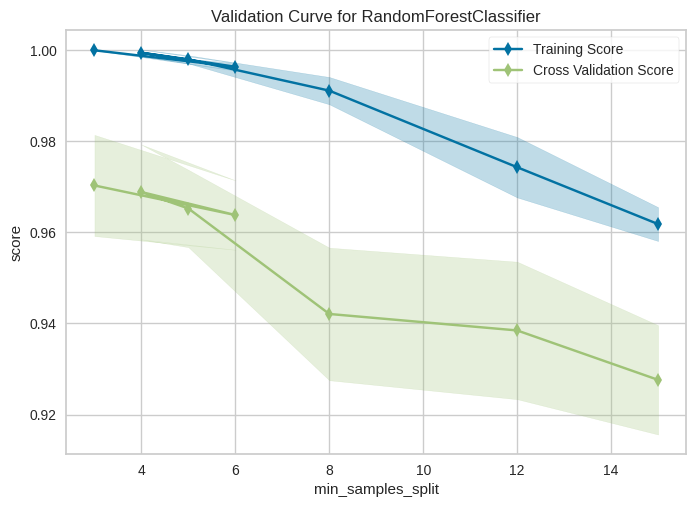

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 3,  6,  4,  5,  8, 12, 15]),
                scoring='accuracy')


In [45]:
min_samples=[3,6,4,5,8,12,15]
print(validation_curve(RandomForestClassifier(),X=X_train,y=y_train,param_name='min_samples_split',param_range=min_samples,scoring='accuracy'))

In [46]:
clf2=RandomForestClassifier(n_estimators=1000,max_depth=15,random_state=0)
clf2.fit(X_train,y_train)
pred2=clf2.predict(X_test)
accuracy_score(y_test,pred2)

0.9710982658959537

In [48]:
feature_scores=pd.Series(clf2.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(feature_scores)

safety      0.280571
persons     0.219579
buying      0.189897
maint       0.154681
lug_boot    0.088355
doors       0.066918
dtype: float64


Text(0.5, 1.0, 'Visualizing Important Features')

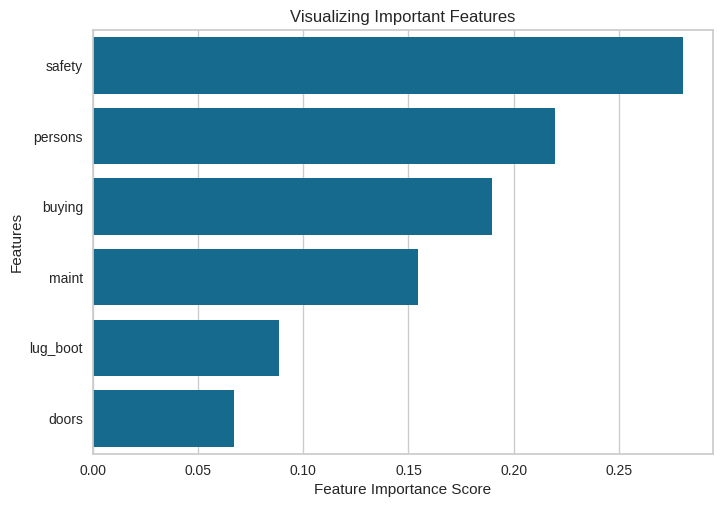

In [49]:
sns.barplot(x=feature_scores,y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

In [50]:
clf3=RandomForestClassifier()
Xn=df.drop(['doors','lug_boot','maint'],axis=1)
yn=df['class']

X_trainn, X_testn, y_train, y_testn=train_test_split(Xn,yn,test_size=0.3,random_state=42)
clf3.fit(X_trainn,y_train)
new_pred=clf3.predict(X_testn)
accuracy_score(y_testn,new_pred)

1.0